In [3]:
# Import libraries

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

In [4]:
# Loading the MNIST Dataset
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("/tmp/data/", one_hot=True)

print('Test shape:',data.test.images.shape)
print('Train shape:',data.train.images.shape)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Test shape: (10000, 784)
Train shape: (55000, 784)


In [5]:
data.test.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [6]:
# Converting the One-Hot encoded vectors to a single number by taking the index of the highest element

data.test.cls = np.array([label.argmax() for label in data.test.labels])
# Print the class of the first 5 images in test data-set
data.test.cls[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [7]:
# Initializing a few data variables & constants
# MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [8]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

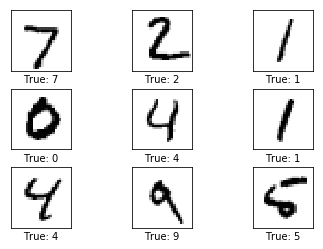

In [9]:
# Lets explore the dataset 
images = data.test.images[0:9]

cls_true = data.test.cls[0:9]    # True classes for those images.

plot_images(images=images, cls_true=cls_true)  # Plot the images and labels using our helper-function.

In [10]:
# Placeholder variable for the input images
x = tf.placeholder(tf.float32, [None, img_size_flat])

# Placeholder variable for the true labels (one hot encoded)
y_true = tf.placeholder(tf.float32, [None, num_classes])

# Placeholder variable for the true labels (Int value-actual label)
y_true_cls = tf.placeholder(tf.int64, [None])

In [11]:
# Defining our model parameters
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

In [12]:
# Simple mathematical mode - Objective function
logits = tf.matmul(x, weights) + biases

In [15]:
y_pred = tf.nn.softmax(logits)

#  Predicting class from the y_pred matrix by taking the index of the largest element in each row.
y_pred_cls = tf.argmax(y_pred, dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [16]:
# TensorFlow has a built-in function for calculating the cross-entropy. 
# Note that it uses the values of the logits because it also calculates the softmax internally.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)

# Averaging the cross-entropy for all the image classifications to calculate the overall cost
cost = tf.reduce_mean(cross_entropy)

In [17]:
# Optimization method
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [18]:
# Measuring some performance measure to evaluate our model
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
session = tf.Session()

# Initializing all variables
session.run(tf.global_variables_initializer())
batch_size = 100      # Defining batch size for training images

# Defining Helper-function to perform optimization iterations
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        # Put the batch into a dict with the proper names
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        # Run the optimizer using batch of training data
        session.run(optimizer, feed_dict=feed_dict_train)

feed_dict_test = {x: data.test.images, y_true: data.test.labels, y_true_cls: data.test.cls}

In [20]:
# Function for printing the classification accuracy on the test-set.
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [21]:
# Function to plot a few test images with actual & predicted values
def plot_test_sample():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    images = data.test.images
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred

    # Get the true classes for those images.
    cls_true = data.test.cls
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [22]:
# Function for plotting the weights of the model
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

Accuracy on test-set: 9.8%


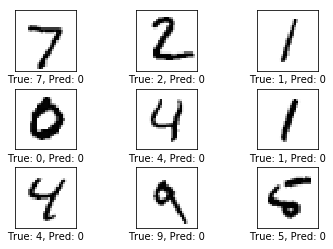

In [23]:
# Performance before any optimization
print_accuracy()
plot_test_sample()

Accuracy on test-set: 29.5%


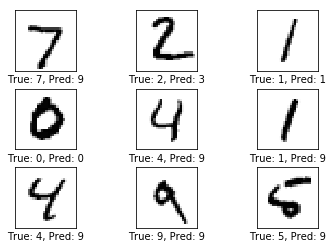

In [24]:
# Performance after 1 optimization iteration
optimize(num_iterations=1)
print_accuracy()
plot_test_sample()

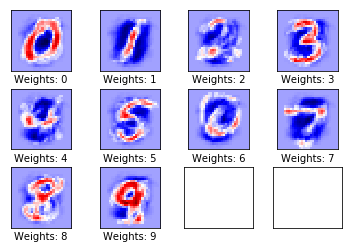

In [25]:
plot_weights()

Accuracy on test-set: 92.2%


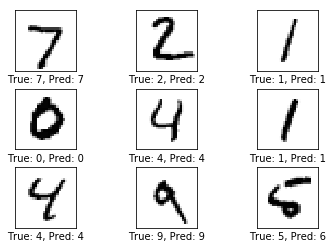

In [36]:
# Performance after 10 optimization iterations
optimize(num_iterations=50)
print_accuracy()
plot_test_sample()

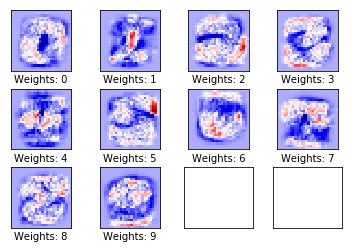

In [37]:
plot_weights()